# --- Pasos a seguir para estimar clusters ---

* Podemos estimar la k:
    * <span style="color:red"><b>NO</span>: Propagación de la afinidad
    * <span style="color:green"><b>SI</span>: Podemos usar la distancia Euclídea:
        * <span style="color:green"><b>SI</span>: K-Means
        * <span style="color:red"><b>NO</span>: Buscar valores centrales:
            * <span style="color:green"><b>SI</span>: K-Medoides 
            * <span style="color:red"><b>NO</span>: Los datos son linealmente separables:
                * <span style="color:green"><b>SI</span>: Clustering aglomerativo
                * <span style="color:red"><b>NO</span>: Clustering Espectral

# Distribuciones en forma de anillo

In [5]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

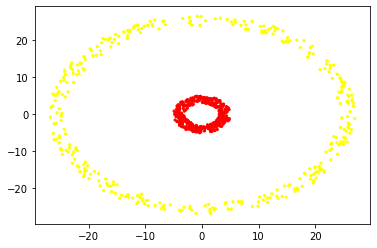

In [7]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

# Algoritmo con Kmeans

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(2).fit(data) #con k=2 (numero de cluster que queremos)

In [10]:
clust = km.predict(data)

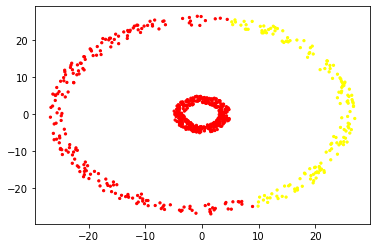

In [11]:
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")

* **Vemos que en este tipo(anillos), el método de KMeans no funciona bien. Para ello tendremos que aplicar el siguiente método:**

# Algoritmo de los K Medoides

Consite en seleccionar k puntos inciales dentro de cada conjunto incial de clusters. Para cada uno de los punto centrales del dataset calcularemos el centro del cluster mas cercano con cualquier tipo de métrica, y la diferencia es que el centro del cluster no quedará asignado al baricentro de esos puntos, sino que quedará asignado a dicho punto en cuestión. Para cada punto del cluster lo que hará será intercambiar el centro del cluster con el punto y calcular la reducción en las distancias totales con respecto al centro del cluster a través de todos los miembros utulizando ese swag?, y sino mejor pues no lo escogerá. Iteraremos cada uno de los puntos del dataset y nos quedaremos como centro uno de los datos del dataset. En el fondo se trata de encontrar el punto que está más en medio(medoide).

In [15]:
from pyclust import KMedoids

In [16]:
kmed = KMedoids(2).fit_predict(data) #queremos buscar 2 medoides(centros). Con fit_predict, hace el modelo y la predicción a la vez

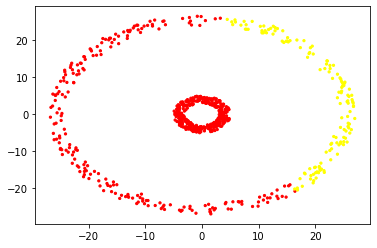

In [17]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

# Algoritmo del Clustering Espectral

In [18]:
from sklearn.cluster import SpectralClustering

In [19]:
clust = SpectralClustering(2).fit_predict(data)

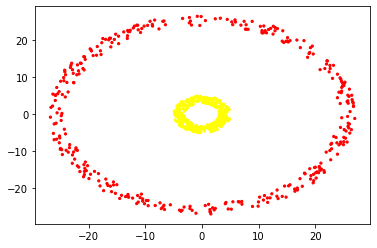

In [20]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")